In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wine = load_wine()
X = wine.data[:, :2]  
y = wine.target 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Latih SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
y_pred = model.predict(X_test)

In [7]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.92      0.86      0.89        14
           2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36



In [8]:
# Visualisasi decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))



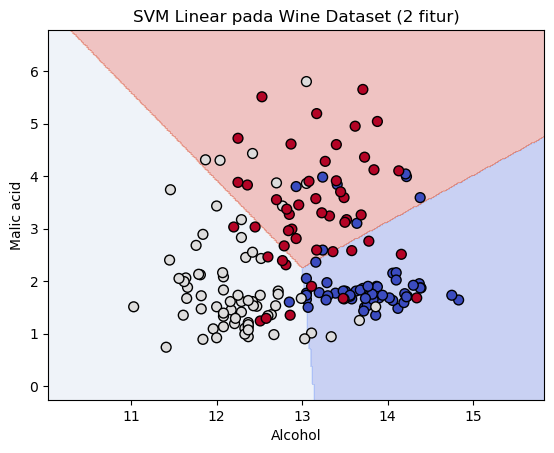

In [9]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=50)
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.title('SVM Linear pada Wine Dataset (2 fitur)')
plt.show()